# Lab 1: Coulomb's Law

# Theory

We can measure the electric force produced by two collections of charge if we can successfully balance that force
with another, known, force. Because we can only move very tiny amounts of charge around, the electric force we
produce tends to be very small, even though we now know that the electric force is much stronger than the gravitational force. It was Charles Augustin de Coulomb who discovered the very sensitive force balance that we will be
using: the torsion balance.

# The Torsion Balance
The torsion balance is the rotational analogue of a spring balance. In a spring balance, a force causes a spring to either stretch or compress and the spring produces a restoring force given by Hooke's Law:

$$F=−kx\tag{1}$$

where $F$ is the restoring force, $x$ is the amount the spring has been stretched or compressed, and $k$ is Hooke's Constant which characterizes the strength of the spring. Coulomb found that a twisted wire would do the same thing for
torque that a spring does for forces:

$$\tau=−k\theta\tag{2}$$

where $\tau$ is the restoring torque produced by the twisted wire, $θ$ is the angle that the wire has been twisted, and $k$ is Hooke's Constant which characterizes the stiffness of the wire. Because we will be working with forces and not torques, we will use a revised version of this equation. Recall that torque is simply the product of a force $F$, and the distance $r$, away from a pivot point that the force acts. So we can re-write equation:

$$rF=−k\theta\tag{3}$$

In the torsion balance, the distance $r$, is a constant. So we can divide both sides by $r$:

$$F=−k'\theta \;where\; k'= \frac{k} {r}\tag{4}$$

We will need to measure this constant $k'$, so that we can convert an angle into a force. By measuring the angles required to produce different forces, we can plot the results and expect that the slope of the Force vs. Angle graph will
give us Hooke's Constant in Newtons per degree [N/deg].

# Coulomb's Law
Coulomb's Law for the force, F, between two charged objects is given as

$$F= \frac{ke Q q}{R^2}\tag{5}$$


Where $ke$ is a constant which makes the units work $(8.98755x10^9 N \frac{m^2}{C^2})$, $Q$ and $q$ are the charges of the two objects (in units of Coulombs), and $R$ is the center-to-center distance between the two charged objects.
In the second part of this experiment, you will be holding the product $keQq$ constant and varying the distance $R$, between the two charged objects to verify that the force follows a $\frac{1}{R2}$
 curve.
In the third part of this experiment, you will hold the distance $R$, constant, and change the charge on each sphere.
Because both spheres will be charged the same, $Q=q$ and we can write
$$F= \frac{ke Q^2}{R^2}$$

The charge on each sphere will depend on the voltage setting $V$, on the power supply and the radius $r$, of the sphere:

$$V=\frac{keQ}{r}\;  or \;Q=\frac{Vr}{ke}\tag{6}$$

The radius of the sphere is 1.900(25) cm.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# The following lines make plots in dark mode look reasonable.  If you are not using dark
# mode you don't need them, but you can also just leave them here and it should work fine.

dark_mode = True
# plotting choices for dark-mode
if (dark_mode):
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
    linecolor = 'w'
else:
    linecolor = 'k'

# Calibration of the Torsion Pendulum

maybe add image here

## Equipment Setup

**Do not rush through the following procedure.  Proper balancing of the pendulum is crucial to getting quality 
data.**


The first step to getting a good measurement is to ensure that the pendulum is balanced properly.
1. Do not remove the conductive sphere from the plastic bag with your hands! Open the plastic bag and slip the sphere's mounting tube onto the fiberglass rod, then gently push the sphere out of the bag.
2. Loosen the upper screw of packing clamp that is holding the vane.  The pendulum should rotate freely.  The pendulum should also be approximately level.
3. Adjust the index arm (that's the arm that has the mark on it and is also the packing clamp) so that it is at the 
same height as the vane and a millimeter or two away from it.
4. Adjust the magnetic damping assembly so that the vane is (vertically) midway between the magnets.
5. Rotate the upper torsion knob so that the scale reads zero degrees.
6. Gently rotate the bottom torsion-wire retainer until the index line on the vane matches the index line on the 
index arm.  Do not loosen the thumbscrew.  This adjustment will require you to be patient, stand well back from the assembly, and give it a minute or two to equilibrate.

In [26]:
# Create a Pandas DataFrame with data for calibration of Torsion pendulum

# Enter Data Here: [m (mg), δm (mg), 𝜃 (deg), δ𝜃 (degrees)]
calibration_data = [[0,  0.0, 75, 0.5],  # mass 1
                    [20, 0.0, 190,0.5],  # mass 2
                    [40, 0.0, 303,0.5],  # mass 3
                    [50, 0.0, 355,0.5],  # mass 5
                    [70, 0.0, 461,0.5],  # mass 5
                    [90, 0.0, 584,0.5]]  # mass 6

# The values in this next line are for the WebWork exercise.
#calibration_data = [[152.9, 0.0, 9.3, 0.0], [448.5, 0.0, 19.3, 0.0], 
#                    [550.5, 0.0, 25.1, 0.0], [560.7, 0.0, 29.8, 0.0], 
#                    [825.7, 0.0, 39.1, 0.0]]

# create dataframe
df = pd.DataFrame(calibration_data, columns = ['Mass_mg', 'dMass_mg', 'Theta_Raw', 'dTheta_Raw'])

print('Raw Data - Calibration')
df


Raw Data - Calibration


,Mass_mg,dMass_mg,Theta_Raw,dTheta_Raw
0,0,0.0,75,0.5
1,20,0.0,190,0.5
2,40,0.0,303,0.5
3,50,0.0,355,0.5
4,70,0.0,461,0.5
5,90,0.0,584,0.5


In [27]:
# What is the uncertainty in the mass?  We are not really told in the video.  But, let's
# make an educated guess ... it is probably going to be some absolute finite number, plus
# some percentage error.

df['dMass_mg'] = 0.1 + df['Mass_mg']*0.01

# Calcualate the actual value of theta by subtracting off the angle for Mass=0.  Also, 
# calculate the error in the actual angle using dTheta = dTheta_Raw[i] + dtheta_Raw[0]

offset = df['Theta_Raw'][0]
doffset = df['dTheta_Raw'][0]

# For WebWork
#offset = 0
#doffset = 0

df['Theta'] = df['Theta_Raw'] - offset
df['dTheta'] = df['dTheta_Raw'] + doffset

# Calculate the mass in kg, and the error in the mass in kg
df['Mass'] = df['Mass_mg']*0.000001
df['dMass'] = df['dMass_mg']*0.000001

# Calculate the gravitational Force (and Error) in Newtons
g = 9.81
df['Force'] = df['Mass']*g
df['dForce'] = df['dMass']*g

print(df.to_string(index=False))

 Mass_mg  dMass_mg  Theta_Raw  dTheta_Raw  Theta  dTheta    Mass        dMass    Force       dForce
       0       0.1         75         0.5      0     1.0 0.00000 1.000000e-07 0.000000 9.810000e-07
      20       0.3        190         0.5    115     1.0 0.00002 3.000000e-07 0.000196 2.943000e-06
      40       0.5        303         0.5    228     1.0 0.00004 5.000000e-07 0.000392 4.905000e-06
      50       0.6        355         0.5    280     1.0 0.00005 6.000000e-07 0.000490 5.886000e-06
      70       0.8        461         0.5    386     1.0 0.00007 8.000000e-07 0.000687 7.848000e-06
      90       1.0        584         0.5    509     1.0 0.00009 1.000000e-06 0.000883 9.810000e-06


# Fitting Stuff

You may have already seen examples of both linear and non-linear regression fits to data.  In most (maybe all?) experiments though, we often have uncertainties associated with each data point.  We should understand more about how this affects the fitting procedure.

The linear/non-linear regression examples that we have studied thus far use a method called "Ordinary Least Squares".  The basic theory behind this is:

$$\chi^2 = \sum_i^N (y_i - y_{fit}(x_i))^2\tag{7}$$

where $y_{fit} = f(a,b,c,...)$ is the fitting function.  The idea is that we must solve the set of equations defined by:

$$\frac{\partial \chi^2}{\partial a} = 0, \frac{\partial \chi^2}{\partial b} = 0, \frac{\partial \chi^2}{\partial c} = 0, ...\tag{8}$$

In the case of polynomial fitting functions (of any order), the values of the polynomial coefficients are uniquely defined.  That is, there is a single global minimum in the $\chi^2$ function.  For other non-linear fitting functions, there may be local minima in the $\chi^2$ function, and this requires that we provide initial starting values for the parameters of the fitting function that are close to the global minimum.

When we have uncertainties for each of the $N$ data points, the definition of $\chi^2$ becomes:

$$\chi^2 = \sum_i^N \left (\frac{y_i - y_{fit}(x_i)}{\sigma_i}\right)^2\tag{9}$$

Now, for this calibration procedure, we have ZERO uncertainty in the y-variable (Mass), and we have some non-zero uncertainty in the x-variable (Angle).  As it turns out, the Ordinary Least Squares procedure can ONLY take into account uncertainties in the y-variable!!!!  This is a actually a significant limitation of this procedure, and we actually should use a more advanced methodology.

The method of choice here is called Orthogonal Distance Regression.  The idea is that we want to minimize the orthogonal distance between the line of best fit and the data points.  It is actually a fairly complicated procedure, and we are
going to use some Python code that I have written to do this that uses some Python libraries written expressly for this
purpose.

# The Fitting Code

The following cell is a very important one!  We will be using this fitting procedure in basically every experiment this semester!!!!

The idea is this:  The first few lines are where we define the data to be fitted.  We need an array of x-values (xi), an array of y-values (yi). We also
include definitions of arrays for the uncertainties in x (sigmaxi) and y (sigmayi).

The lines after that carry out a fairly sophisticated fitting procedure that includes calculation of upper and lower "bands" of the fit corresponding to the error limits on the fit parameters.  These lines give a nice visual
interpretation of how good the fit is, and whether it captures the variation in the
data.

This code also prints out the final result for the Y = (m +/- dm)X + ( b +/- db) fit.  

*NOTE*:  You might have to change the number of decimal places that are printed out for the final result!!!

Beta: [ 1.74633555e-06 -1.02109544e-06]
Beta Std Error: [1.41850508e-08 2.18283449e-06]
Beta Covariance: [[ 1.46398627e-16 -1.27246150e-14]
 [-1.27246150e-14  3.46670450e-12]]
Residual Variance: 1.3744368433612735
Inverse Condition #: 0.0053713546516330705
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (0.000001746 +/- 0.000000014) X + (-0.000001021 +/- 0.000002183)


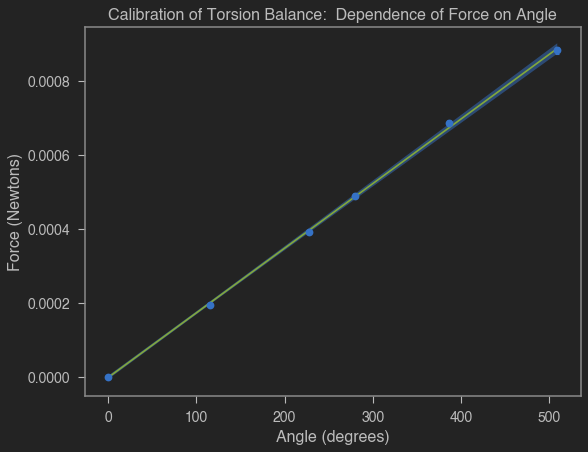

In [28]:
xi = df['Theta']
yi = df['Force']
sigmaxi = df['dTheta']
sigmayi = df['dForce']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[1., 2.]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(pi,xi) for pi in ps])

lower = np.percentile(ysample,0.5,axis=0)
upper = np.percentile(ysample,99.5,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.9f +/- %0.9f) X + (%0.9f +/- %0.9f)" % (popt[0],perr[0],popt[1],perr[1]))

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xi,middle)
plt.fill_between(xi,lower,upper,alpha=0.5)

#########################

plt.xlabel('Angle (degrees)')
plt.ylabel('Force (Newtons)')
plt.title('Calibration of Torsion Balance:  Dependence of Force on Angle')
plt.show()

## Analysis of Calibration Result

First of all, we see that this is a very good fit.  The upper and lower error band lines
are barely distinguishable from one another.  This tells us that we are able to determine the Force for a given angle quite accurately!  Cool!

Second, we see that the result for the y-intercept (b) is consistent with zero $(0.135 \pm 1.312) \times 10^{-6}$ Newtons.  This is consistent with our expectations.  Since it is consistent with
zero, we can just ignore this going forward and assume it is identically zero.

Third, we see that the calibration constant that we were trying to determine is
$(1.475 \pm 0.008) \times 10^{-6}$ Newtons/degree.  As we said, this is quite well-determined ... the percentage error is $(0.008/1.475)*100\% = 0.54 \%$.

In [29]:
#
# Remember the results of the calibration part of the experiment ... we will use this later, to convert angles into Force values!
#
calibration_factor = popt[0]

# We will use 3 times the error in the slope from above, as this represents a 99% confidence level ... this is appropriate
# given that we are assuming "maximum possible error" when combining with other instrumental uncertainties in the
# experiment
dcalibration_factor = 3*perr[0]

# Part I:  Investigation of the Dependence of the Force on Distance

Now that we can compute the restoring force given a torsion angle, we are ready to measure electrical forces. This
will require a little set up:
1. Ensure that the conductive sphere has not slipped down the rod. Ensure that the upper torsion knob reads
zero degrees. Adjust the bottom torsion wire retainer so that the two index marks are aligned.
2. On the slide assembly, slide the movable sphere to its furthest position (38 cm) and attach the slide assem -
bly to the Coulomb Balance using the two plastic screws (Be careful not to cross-thread the plastic screws!
If they won't go in easily, call your instructor over.)
3. Carefully slide the movable sphere to the 3.8 cm mark. The two spheres should just touch when the index
marks are aligned on the Coulomb Balance and the movable sphere is set to 3.8 cm. You can adjust the po-
sition of the movable sphere by loosening the screw on the top of the post holding the movable sphere.
Make sure you re-tighten the screw after you've adjusted the movable sphere's position.
4. Attach the ground clip from the High Voltage power supply to the index arm of the Coulomb Balance.

You are now ready to take data. We will be charging both spheres with the power supply set to 6 kV. The uncer -
tainty in the voltage (
($\delta V$) is 1% + 1 digit (i.e. 1% of the value displayed plus 1x the smallest digit displayed. In this
case, that would be 1% + 10 V).
1. Slide the movable sphere to the far end of the track (38 cm).
2. Turn on the power supply and ensure it is set to 6 kV.
3. Charge both spheres by gently touching them with the probe. Keep your hands as far from the spheres as possible to avoid capacitive effects. Do not touch the spheres after they've been charged. If you accidentally touch one, discharge it using the ground clip and then re-charge.
4. Turn off the power supply.
5. Slide the movable sphere to 20 cm. The Coulomb Balance will move due to the electric force pushing the
spheres apart.
6. Rotate the upper torsion knob until the index marks are once again aligned. Try to do this at arm's length (Hint: don't worry about reading the dial until the index marks are aligned). Record this angle in Table 2.
7. Return the upper torsion knob to zero degrees, slide the movable sphere to 38 cm, and discharge both spheres by touching the grounding clip to each one. Replace the grounding clip.
8. Verify that the index marks are once again aligned. If not, adjust the lower torsion wire retainer.
9. Repeat steps 2—8 and verify your result.
10. Repeat steps 2—9 for the following distances: 14, 10, 9, 8, 7, and 6 cm.

In [30]:
# Create a Pandas DataFrame with data for part 1 of the experiment:  understanding the relation of Force to distance, at constant
# charge

# The data elements are [distance in cm, angle in degrees] ... again, since we are going to do a linear regression using OLS, we will
# not include errors
data1 = [[20,12, 0.5],[20,10,0.5], #20 cm
         [14,17,0.5], [14,19,0.5], #14 cm
         [10,29,0.5], [10,26,0.5], #10 cm
         [9,32,0.5], [9,39,0.5],   #9 cm
         [8,65,0.5], [8,66,0.5], #8 cm
         [7,95,0.5], [7,103,0.5], #7 cm
         [6,113,0.5], [6,114,0.5]] #6 cm
# create dataframe
df2 = pd.DataFrame(data1, columns = ['R_cm', 'Theta','dTheta'])

print(df2.to_string(index=False))

 R_cm  Theta  dTheta
   20     12     0.5
   20     10     0.5
   14     17     0.5
   14     19     0.5
   10     29     0.5
   10     26     0.5
    9     32     0.5
    9     39     0.5
    8     65     0.5
    8     66     0.5
    7     95     0.5
    7    103     0.5
    6    113     0.5
    6    114     0.5


The theory tells us that $F = k \frac{ Q_1  Q_2}{R^2}$.  So, if we were to plot a 
graph of $F$ vs. $\frac{1}{R^2}$, it should be a straight line
with a slope of $k Q_1 Q_2$.  Let's try that!

So, how do calculate force values from the given angles, with error?  The idea is as follows:

$$F = C \cdot \theta\tag{10}$$

where we have uncertainties in both $C$ and $\theta$.  From basic uncertainty analysis, we know that:

$$\frac{dF}{F} = \frac{dC}{C} + \frac{d\theta}{\theta}$$

$$dF= F (\frac{dC}{C} + \frac{d\theta}{\theta})\tag{11}$$

In [31]:
# We will have to convert the angle values to Forces, and also include an uncertainty.
# We will have to convert the measured radius values to meters, and include an uncertainty.

df2['Force'] = df2['Theta']*calibration_factor
df2['dForce'] = df2['Force']*(dcalibration_factor/calibration_factor + 
                              df2['dTheta']/df2['Theta'])

df2['R'] = df2['R_cm']*0.01
df2['dR'] = 0.001 #guess

print(df2.to_string(index=False))

 R_cm  Theta  dTheta    Force   dForce    R    dR
   20     12     0.5 0.000021 0.000001 0.20 0.001
   20     10     0.5 0.000017 0.000001 0.20 0.001
   14     17     0.5 0.000030 0.000002 0.14 0.001
   14     19     0.5 0.000033 0.000002 0.14 0.001
   10     29     0.5 0.000051 0.000002 0.10 0.001
   10     26     0.5 0.000045 0.000002 0.10 0.001
    9     32     0.5 0.000056 0.000002 0.09 0.001
    9     39     0.5 0.000068 0.000003 0.09 0.001
    8     65     0.5 0.000114 0.000004 0.08 0.001
    8     66     0.5 0.000115 0.000004 0.08 0.001
    7     95     0.5 0.000166 0.000005 0.07 0.001
    7    103     0.5 0.000180 0.000005 0.07 0.001
    6    113     0.5 0.000197 0.000006 0.06 0.001
    6    114     0.5 0.000199 0.000006 0.06 0.001


Beta: [ 6.62473113e-07 -2.49416655e-06]
Beta Std Error: [6.34568860e-08 5.02654755e-06]
Beta Covariance: [[ 1.58168317e-16 -9.70912872e-15]
 [-9.70912872e-15  9.92433859e-13]]
Residual Variance: 25.45880521706475
Inverse Condition #: 0.007963617903703916
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (0.000000662 +/- 0.000000063) X + (-0.000002494 +/- 0.000005027)


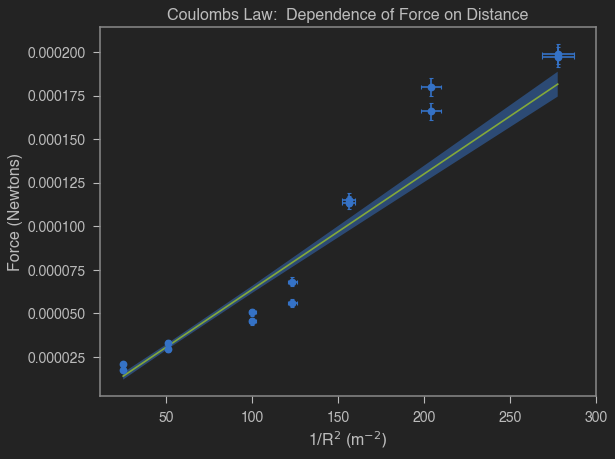

In [32]:
xi = 1.0/(df2['R'])**2
yi = df2['Force']

sigmaxi = xi*2.0*(df2['dR']/df2['R'])
sigmayi = df2['dForce']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

linear = Model(fitfunction)
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi)
myodr = ODR(mydata, linear, beta0=[1., 2.])
myoutput = myodr.run()

myoutput.pprint()

popt = myoutput.beta
pcov = myoutput.cov_beta
perr = myoutput.sd_beta

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(pi,xi) for pi in ps])

lower = np.percentile(ysample,0.5,axis=0)
upper = np.percentile(ysample,99.5,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.9f +/- %0.9f) X + (%0.9f +/- %0.9f)" % (popt[0],perr[0],popt[1],perr[1]))

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xi,middle)
plt.fill_between(xi,lower,upper,alpha=0.5)

#########################
plt.xlabel('1/R$^2$ (m$^{-2})$')
plt.ylabel('Force (Newtons)')
plt.title('Coulombs Law:  Dependence of Force on Distance')
plt.show()

## Preliminary observations 

So, our first observation is that indeed, the plot seems roughly linear, as we expected!  This means that our guess for the form of the force law was probably correct!  

We know that the slope is supposed to be $k Q_1 Q_2$.  So, what are $Q_1$ and $Q_2$?  According to the same theory, they should be
equal to one another, and be related to the applied voltage, V, according to:

$$Q = \frac{R_{sphere}}{k} V\tag{12}$$

Substituting this into our experession for the slope, we get:

$$slope = k  \left( \frac{R_{sphere}}{k} V \right) \left( \frac{R_{sphere}}{k}V \right) = \frac{R_{sphere}^2 V^2}{k}$$

$$k = \frac{R_{sphere}^2 V^2}{slope}\tag{13}$$

We used $V = 6.00~kV = 6000~V$.
We are told that $R_{sphere} = 1.9~cm = 0.019~m$.

But, there are uncertainties in both of these numbers:

$$dV = 10~Volts + (0.01)V = 10~Volts + 0.01(6000 V) = 70~Volts$$

$$dR_{sphere} = 0.1~cm = 0.001~m\tag{14}$$

From basic error analysis, we get that $\frac{dk}{k} = 2 \frac{dR_{sphere}}{R_{sphere}} + 2\frac{dV}{V} + \frac{dslope}{slope}\tag{15}$

In [33]:
#
# Now, let us see if we can calculate what k is, based on the slope from the previous graph
#

slope = popt[0]
# Let's choose +/- 3*sigma (99% confidence level) as the error in the slope.  Given that
# we are going to combine this error together with errors in the sphere radius and the
# sphere-to-sphere distance, which are clearly maximum possible error estimates, this is
# a reasonable choice.
dslope = 3*perr[0]

V = 6000
dV = 10 + 0.01*V
R_sphere = 0.019
dR_sphere = 0.001

k = R_sphere**2*V**2/slope
dk = k*(2*dR_sphere/R_sphere+2*dV/V+dslope/slope)

print ('Extracted value of k = (%0.1f +/- %0.1f) x 10^9 Nm^2/C^2' % (k/1e9,dk/1e9))

Extracted value of k = (19.6 +/- 8.2) x 10^9 Nm^2/C^2


In [34]:
# Finally, let's calculate an error budget.  We would like to understand how much the various uncertainties in the experiment
# contribute to the final error that we get in the extraction of k.

error_budget = [['R_sphere',2*dR_sphere/R_sphere*100],['V',2*dV/V*100],['Slope',dslope/slope*100],['Total',dk/k*100]]
df4 = pd.DataFrame(error_budget, columns = ['Source', 'Percentage Error'])

df4

,Source,Percentage Error
0,R_sphere,10.526316
1,V,2.333333
2,Slope,28.736360
3,Total,41.596009


# Analysis of Part I

Our first observation, as noted above, is that we see the expected linear dependence, as predicted by theory.

The extracted value of $k_e$ is $(13.3 \pm 3.3) \times 10^{9} Nm^2/C^2$.  This is slightly higher than the expected value of $k_e = 9 \times 10^{9} Nm^2/C^2$.


# Part II:  Investigation of the Dependence of the Force on Charge

For this part of the experiment, you will verify that the force increases linearly with the charge. However, because
you will be charging both spheres, the fit should actually be quadratic according to equation (6). The procedure is
almost identical to the previous experiment:
1. Slide the movable sphere to the far end of the track (38 cm).
2. Turn on the power supply and ensure it is set to 6 kV.
3. Charge both spheres by gently touching them with the probe. Keep your hands as far from the spheres as possible to avoid capacitive effects. Do not touch the spheres after they've been charged. If you accidentally touch one, use the grounding clip to discharge it and then re-charge it.
4. Turn off the power supply.
5. Slide the movable sphere to d = 0.08 m. The Coulomb Balance will move due to the electric force pushing the spheres apart.
6. Rotate the upper torsion knob until the index marks are once again aligned. Try to do this at arm's length (Hint: don't worry about reading the dial until the index marks are aligned). Record this angle in Table 3.
7. Return the upper torsion knob to zero degrees, slide the movable sphere to 38 cm, and discharge both spheres by touching the grounding clip to each one. Replace the grounding clip.
8. Verify that the index marks are once again aligned. If not, adjust the lower torsion wire retainer.
9. Repeat steps 2—8 and verify your result.
10. Repeat steps 2—9 for the following voltages: 5, 4, 3, 2, and 1 kV.
11. Plot the restoring force, $k'\theta$, in Newtons vs. the charge squared, Q2, and do a linear fit (you will needequation (7) to compute the charge).

**Using the code from Part I as a starting point, analyze the data from Part II** 

## Clean Up
Once you've completed the experiment, return your Coulomb Balance to a safe state by following these steps in this
order:
1. Ensure that the HV power supply is switched off. Remove the grounding clip.
2. Loosen the index arm and move it so that it is in a position to clamp the vane of the Balance.
3. Secure the index arm.
4. Use two fingers to press the lower portion of the clamp against the bottom of the vane and pin it against the underside of the index arm. While holding pressure, securely tighten the clamp with the plastic screw.
5. Gently remove the Coulomb Balance sphere from the rod by sliding the sphere into the bag and then gently slide the sphere off of the rod. Close the bag and set it on the bottom plate of the balance.
6. Unscrew the two screws in the sliding assembly holding the sliding assembly to the Coulomb Balance. Move the sliding assembly aside and loosely replace the screws back into the sliding assembly (just a few turns will suffice).